# Deflexão em Vigas 

Viga prismática biapoiada AB com uma carga distribuída q (kN/m)

In [326]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib import rc

# Set the font dictionaries (for plot title and axis titles)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size': '18'})
rc('text', usetex=True)

In [327]:
q = 10
L = 3
N=100

E = 210e9 # Módulo de Elasticidade (GPa)
b = 15e-3
h = 30e-3
I = b*(h**3)/12

# Reações de Apoio
VA=q*L/2
VB=q*L/2
print("Reação de Apoio em A (kN) =",VA)
print("Reação de Apoio em B (kN) =",VB)

Reação de Apoio em A (kN) = 15.0
Reação de Apoio em B (kN) = 15.0


Cálculo da Cortante pela integração do carregamento usando a Regra do Trapézio

In [328]:
def Cortante(q,x,V0):
    # Entro com o carregamento, comprimento do trecho e cortante em x[0]
    V = np.zeros(len(x)) # inicializa
    dx=x[1]    # passo
    V[0]=V0   # Valor inicial da cortante
    for i in range(1,N):
        V[i]=V[i-1]+dx*(q[i-1]+q[i])/2
    return np.array(V)

Cálculo do Momento Fletor pela integração da cortante usando a Regra do Trapézio

In [329]:
def Momento(V,x,M0):
    # Entro com a cortante, comprimento do trecho e momento em x[0]
    M = np.zeros(len(x)) # inicializa
    dx=x[1]    # passo
    M[0]=M0   # Valor inicial da cortante
    for i in range(1,N):
        M[i]=M0+M[i-1]+dx*(V[i-1]+V[i])/2
    return np.array(M)

Cálculo da Declividade pela integração do momento usando a Regra do Trapézio

In [330]:
def Declividade(M,x,E,I,theta0):
    # Entro com o momento, comprimento do trecho e momento em x[0]
    theta = np.zeros(len(x)) # inicializa
    dx=x[1]    # passo
    theta[0]=theta0   # Valor inicial da cortante
    for i in range(1,N):
        theta[i]=theta[i-1]+dx*(M[i-1]/(E*I)+M[i]/(E*I))/2
    return np.array(theta)

In [331]:
def Flecha(theta,x,u0):
    # Entro com o theta, comprimento do trecho e momento em x[0]
    u = np.zeros(len(x)) # inicializa
    dx=x[1]    # passo
    u[0]=u0   # Valor inicial da cortante
    for i in range(1,N):
        u[i]=u[i-1]+dx*(theta[i-1]+theta[i])/(2)
    return np.array(u)

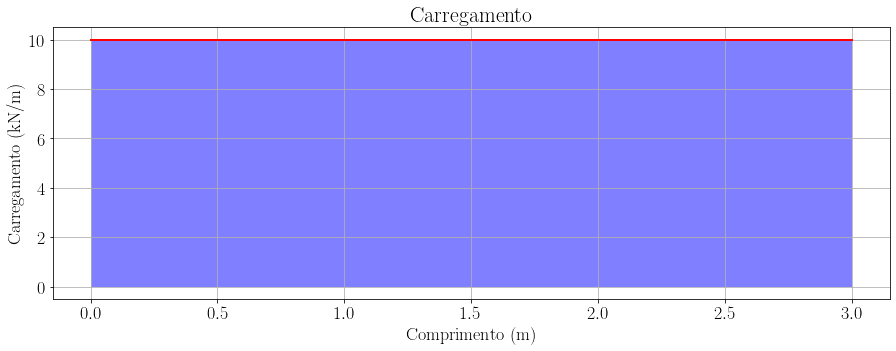

In [332]:
carregamento = q*np.ones(N)
x=np.linspace(0,L,N)

# Carregamento
plt.figure(figsize=(15,5))
plt.plot(x,carregamento,color='r',linewidth=2)
plt.fill_between(x,carregamento, facecolor='b', alpha=0.5)
plt.xlabel("Comprimento (m)")
plt.ylabel("Carregamento (kN/m)")
plt.grid(which='major', axis='both')
plt.title("Carregamento")
plt.show()

In [333]:
# Trecho: 0<x<L
V=-q*x+VA                   # Cortante Teórica
M=VA*x-q*(x**2)/2           # Momento Teórico

theta_teorico = (-1/6*q*x**3 +1/4*q*L*x**2 -1/24*q*L**3)/(E*I)    # declividade teórico
u_teorico = q/(24*E*I)*(-x**4 + 2*L*x**3 -(L**3)*x) # deflexão teórico

# por integração numérica
Vint = Cortante(-carregamento,x,VA)
Mint = Momento(Vint,x,0)
theta = Declividade(Mint,x,E,I,-0.001587) # teste com -0.001587
u=Flecha(theta,x,0)

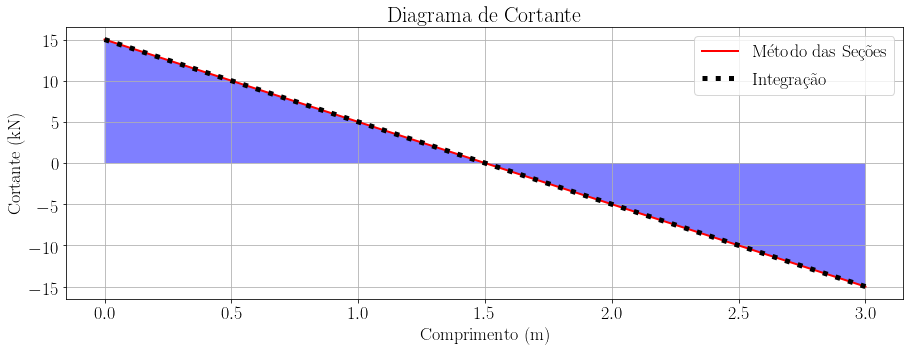

In [338]:
# Cortante
plt.figure(figsize=(15,5))
plt.plot(x,V,color='r',linewidth=2,label="Método das Seções")
plt.fill_between(x, V, facecolor='b', alpha=0.5)
plt.plot(x,Vint,color='k',linestyle = 'dotted', linewidth=5,label="Integração")
plt.legend(loc ="upper right")
plt.xlabel("Comprimento (m)")
plt.ylabel("Cortante (kN)")
plt.grid(which='major', axis='both')
plt.title("Diagrama de Cortante")
plt.show()

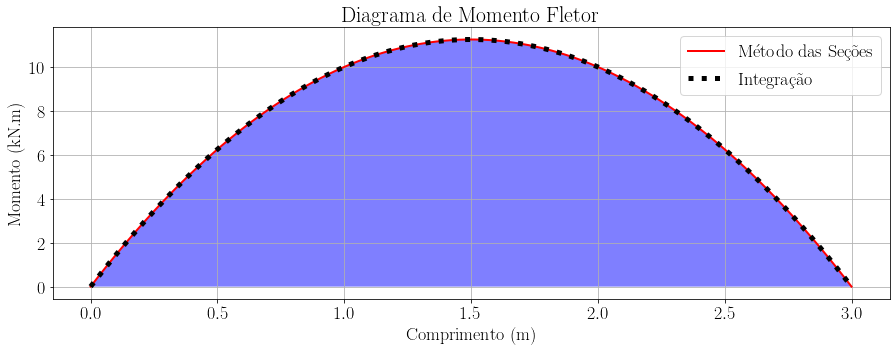

In [335]:
# Momento Fletor
plt.figure(figsize=(15,5))
plt.plot(x,M,color='r',linewidth=2,label="Método das Seções")
plt.fill_between(x, M, facecolor='b', alpha=0.5)
plt.plot(x,Mint,color='k',linestyle = 'dotted', linewidth=5,label="Integração")
plt.legend(loc ="upper right")
plt.xlabel("Comprimento (m)")
plt.ylabel("Momento (kN.m)")
plt.grid(which='major', axis='both')
plt.title("Diagrama de Momento Fletor")
plt.show()

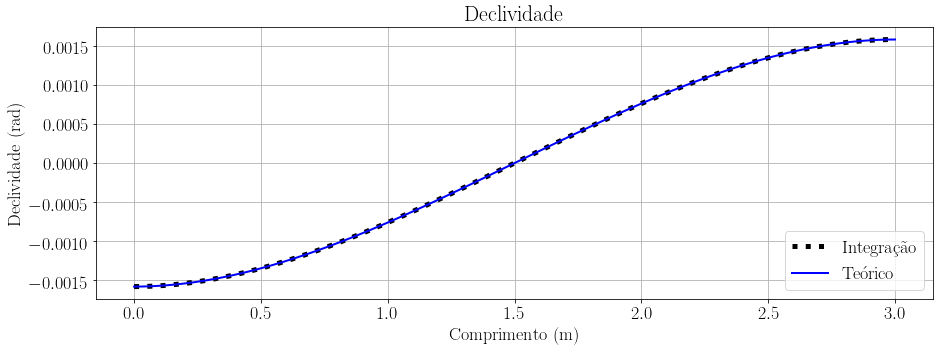

In [336]:
# Declividade
plt.figure(figsize=(15,5))
plt.plot(x,theta,color='k',linestyle = 'dotted', linewidth=5,label="Integração")
plt.plot(x,theta_teorico,color='b', linewidth=2,label="Teórico")
plt.legend(loc ="lower right")
plt.xlabel("Comprimento (m)")
plt.ylabel("Declividade (rad)")
plt.grid(which='major', axis='both')
plt.title("Declividade")
plt.show()


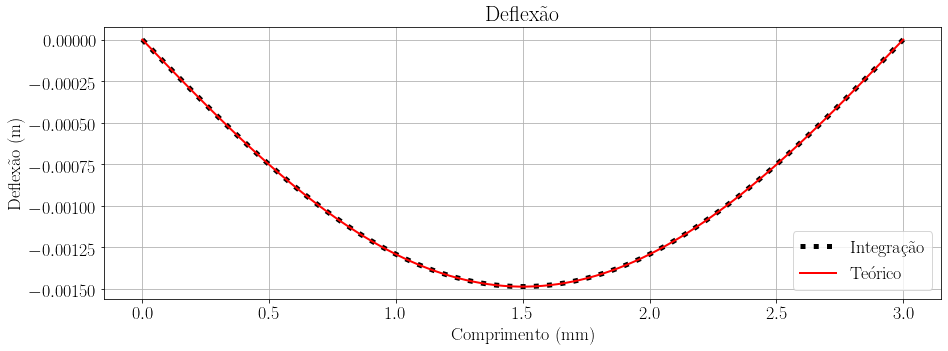

In [337]:
# Deflexão
plt.figure(figsize=(15,5))
plt.plot(x,u,color='k',linestyle = 'dotted', linewidth=5,label="Integração")
plt.plot(x,u_teorico,color='r', linewidth=2,label="Teórico")
plt.legend(loc ="lower right")
plt.xlabel("Comprimento (mm)")
plt.ylabel("Deflexão (m)")
plt.grid(which='major', axis='both')
plt.title("Deflexão")
plt.show()